In [1522]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle



In [1523]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
#data_semNF = pd.read_csv("nge_dados_input_semNF.csv") # jobs sem nota está emoutro método

In [1524]:
data.dtypes

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_pg_word           int64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
tamanho_livro         int64
dtype: object

In [1525]:
data.head(12)

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,tamanho_livro
0,224323,0,0,1,0,87,140.0,87,116142,505,742,60.0,140,2
1,224325,0,0,1,0,82,122.0,82,108307,76,94,69.0,122,2
2,225392,0,0,3,0,41,70.0,30,41144,28,24,23.0,52,1
3,225392,0,0,3,0,41,70.0,42,62913,432,696,21.0,52,1
4,225531,0,0,2,0,36,48.0,36,37548,270,456,17.0,48,0
5,228711,2,0,1,0,77,108.0,77,101967,317,517,17.0,88,1
6,226842,0,0,1,0,46,66.0,46,96474,99,114,37.0,66,1
7,227130,0,0,1,0,66,102.0,66,112888,604,872,23.0,82,1
8,228307,0,0,1,0,62,95.0,62,43155,40,73,25.0,70,1
9,228354,0,0,1,0,76,110.0,76,129122,14,10,26.0,96,1


In [1526]:
data['qtd_pg_word'].unique()

array([ 87,  82,  30,  42,  36,  77,  46,  66,  62,  76,  80,  13,  34,
        52,  18,  78,  50,  47,  54,  88,  91,  38, 214,  22,  26,  92,
        14,  40,  81,  63, 216,  24,  33, 195,  29,  60,  70,  72, 107,
        85,  68,  41, 112,  45,  19,  51,  31,  56,  28,  21,  12,  17,
       131,  67, 207,  43,  86,  90,  49,  39,  59,  48,  57,  73,  23,
        37])

In [1527]:
data['qtd_pag_word'].unique()

array([ 87,  82,  41,  36,  77,  46,  66,  62,  76,  18,  33,  34,  57,
        22,  78,  50,  38,  54,  88,  91,  80, 214,  26,  83,  40,  81,
        63, 216,  51,  27, 195,  29,  58,  70,  92,  72, 107,  85,  67,
        24, 112,  45,  19,  31,  56,  28,  12, 158, 207,  43,  17,  86,
        90,  49, 168, 162,  59,  48, 100,  39,  42,  32,  73,  23])

In [1528]:
data[data['qtd_pag_word']!=data['qtd_pg_word']][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
2,225392,41,30,52
3,225392,41,42,52
10,228437,18,80,18
11,228603,33,13,40
13,228837,57,52,68
14,229294,22,18,34
18,229536,38,47,84
28,231210,83,92,112
29,230571,80,14,110
35,231890,51,52,76


In [1529]:
data[(data['qtd_pg_word']-data['qtd_pag_word'])>10][['id','qtd_pag_word','qtd_pg_word','pag_final']]

,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18
71,233893,66,77,98
74,233904,38,50,68


In [1530]:
data[data['qtd_pag_word']==data['pag_final']][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18
84,0,168,70,168
85,0,162,70,162


In [1531]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final

# critério da diferença entre qtd pagina digitado e qtd pagina raspado do word
criterio01= ((data['qtd_pg_word']-data['qtd_pag_word'])>10)

# critério de qtd pagina digitado e qtd pagina da nota fiscal serem iguais
criterio02=(data['qtd_pag_word']==data['pag_final'])
data[(criterio02 & criterio01)][['id','qtd_pag_word','qtd_pg_word','pag_final']]


,id,qtd_pag_word,qtd_pg_word,pag_final
10,228437,18,80,18


In [1532]:
# Deletar linha quando a quantidade de pagina do word for igual a quantidade de pagina final
# caso que o 
data = data[~(criterio02 & criterio01)]

In [1533]:
# tentanto estatificar o dataframe
print(len(data[data["pag_final"]>149]))
print(len(data[(data["pag_final"]>59) & (data["pag_final"]<150)]))
print(len(data[data["pag_final"]<60]))

7
57
45


In [1534]:
print(len(data[data["tamanho_livro"]==2]))
print(len(data[data["tamanho_livro"]==1]))
print(len(data[data["tamanho_livro"]==0]))

10
80
19


In [1535]:
#data["pag_final"].to_numpy()

In [1536]:
# Lambda function with if, elif & else i.e.
# If the given value is less than 10 then Multiplies it by 2
# else if it's between 10 to 20 the multiplies it by 3
# else returns the unmodified same value
#converter = lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)

In [1537]:
#list(map(lambda banco: banco>149, data['qtd_pag_word']))


In [1538]:
#list(filter(lambda banco: banco>149, data['qtd_pag_word']))

In [1539]:

#lambda_function = lambda x: x*2 if x<3 else x
#lambda_function(2)

# fazer um critério de seleção de dados:
### se o dado colhido na tabela (qtd_pag_word) tiver diferente da raspagem do word (qtd_pg_word) mais de 5 pontos deve retirar do arquivo de entrada. 
###  - incluir a coluna raspagem do word (qtd_pg_word)  para treinamento

In [1540]:
data['id'].count()

109

In [1541]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [1542]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_pg_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,tamanho_livro
count,109.000000,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,224034.449541,0.284404,0.055046,1.431193,0.0,59.000000,93.137615,55.330275,83753.422018,277.339450,372.394495,26.678899,77.761468,0.917431
std,44017.653230,0.609975,0.229123,0.629035,0.0,41.499888,61.286436,38.682242,84278.605996,168.195445,232.066203,13.166231,53.807424,0.511505
min,0.000000,0.000000,0.000000,0.000000,0.0,12.000000,35.000000,12.000000,12032.000000,2.000000,2.000000,3.000000,22.000000,0.000000
25%,230630.000000,0.000000,0.000000,1.000000,0.0,33.000000,48.000000,29.000000,31211.000000,132.000000,174.000000,18.000000,46.000000,1.000000
50%,233263.000000,0.000000,0.000000,1.000000,0.0,46.000000,80.000000,46.000000,66193.000000,293.000000,373.000000,23.000000,68.000000,1.000000
75%,235142.000000,0.000000,0.000000,2.000000,0.0,76.000000,110.000000,70.000000,101971.000000,422.000000,484.000000,29.000000,92.000000,1.000000
max,235831.000000,2.000000,1.000000,3.000000,0.0,216.000000,420.000000,216.000000,571640.000000,604.000000,872.000000,71.000000,340.000000,2.000000


# Normalizar?

In [1543]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [1544]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [1545]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

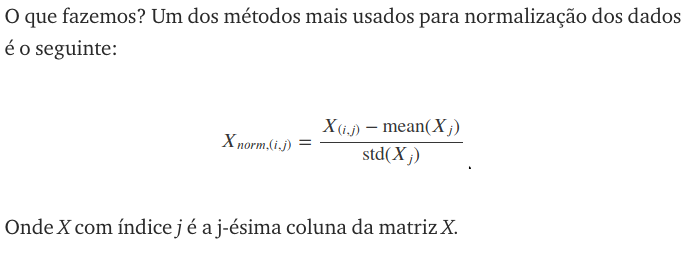

In [1546]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [1547]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [1548]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [1549]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [1550]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [1551]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [1552]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_pg_word', 'qtd_carc',
       'qtd_tabela', 'qtd_image', 'qtd_estilos', 'pag_final', 'tamanho_livro',
       'qtd_carc_normal'],
      dtype='object')

In [1553]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image', 'qtd_carc','tamanho_livro']

#colunas_X= ['qtd_pag_word', 'qtd_pg_word','qtd_tabela','qtd_image','qtd_carc','tamanho_livro']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [1554]:
X.columns

Index(['complexidade', 'entidade', 'qtd_pag_word', 'qtd_pg_word', 'qtd_tabela',
       'qtd_image', 'qtd_carc', 'tamanho_livro'],
      dtype='object')

In [1555]:
# método train_test_split, Scikit-Learn 
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.10, random_state=1,stratify=X['tamanho_livro'])

In [1556]:
X_train_f.shape, X_test_f.shape, y_train_f.shape, y_test_f.shape

((98, 8), (11, 8), (98, 1), (11, 1))

In [1557]:
y_test_f.head()

,pag_final
20,110
43,66
39,48
27,72
69,176


In [1558]:
X_train_f

,complexidade,entidade,qtd_pag_word,qtd_pg_word,qtd_tabela,qtd_image,qtd_carc,tamanho_livro
83,1,0,49,49,469,451,103663,1
8,1,0,62,62,40,73,43155,1
16,1,0,78,78,365,562,120783,1
0,1,0,87,87,505,742,116142,2
52,1,2,78,76,403,638,83989,1
...,...,...,...,...,...,...,...,...
99,1,0,40,40,178,266,45137,1
72,2,0,19,19,456,436,16370,1
100,1,0,73,73,181,271,162582,1
34,1,0,63,63,149,172,74781,1


In [1559]:
X_train_f.dtypes

complexidade     int64
entidade         int64
qtd_pag_word     int64
qtd_pg_word      int64
qtd_tabela       int64
qtd_image        int64
qtd_carc         int64
tamanho_livro    int64
dtype: object

In [1560]:
y_train_f

,pag_final
83,84
8,70
16,86
0,140
52,100
...,...
99,62
72,38
100,110
34,74


In [1561]:
print(X_train_f.shape,y_train_f.shape)

(98, 8) (98, 1)


In [1562]:
print(X_train_f.shape,y_train_f.values.ravel().shape)

(98, 8) (98,)


In [1563]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

#modelo.fit(X_train_f, y_train_f)
modelo = modelo.fit(X_train_f, y_train_f.values.ravel())

# https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
#.values will give the values in an array. (shape: (n,1)
#.ravel will convert that array shape to   (n, )

In [1564]:
p = modelo.predict(X_test_f)

In [1565]:
p

array([84, 84, 40, 62, 84, 86, 46, 48, 68, 84, 76])

In [1566]:
print(p.shape,y_test_f.shape)

(11,) (11, 1)


In [1567]:
y_test_f

,pag_final
20,110
43,66
39,48
27,72
69,176
71,98
38,46
58,48
93,82
17,70


In [1568]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_f,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo
# RMSE:  28.926238482168273   ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
# RMSE:  9.302980949429841 depois de configurar split por estratificação
# RMSE:  14.142135623730951

RMSE:  30.546536777364945


In [1569]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-forest3a.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

In [1570]:
##############################################################################################################

In [1571]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [1572]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [1573]:
##############################################################################################################

In [1574]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [1635]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['id','qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc','qtd_tabela','qtd_image']
colunas_X= ['id','complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word','qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal','tamanho_livro']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [1636]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1,stratify=X['tamanho_livro']) # feito com 0,10 e agora com 0,20

In [1637]:
####
####   selecionar a FEATURES para MODELO
####
# mantendo algumas features para compara resultados no final no arquivo X_train_ref
X_test_ref = X_test.copy()
X_train_ref= X_train.copy()

# X_test = X_test_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_test = X_test_ref[[ 'qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_test = X_test_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

#X_test = X_test_ref[[ 'qtd_pag_word','qtd_pg_word','qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']]
X_test = X_test_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal','tamanho_livro']]


#X_train = X_train_ref[['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']]

#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']]
#X_train = X_train_ref[['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']]

#X_train = X_train_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']]

X_train = X_train_ref[['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal','tamanho_livro']]


In [1638]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos', 'qtd_carc_normal',
       'tamanho_livro'],
      dtype='object')

In [1639]:
X_train

,qtd_pag_word,qtd_pg_word,qtd_tabela,qtd_image,qtd_carc_normal,tamanho_livro
83,49,49,469,451,0.163741,1
8,62,62,40,73,0.055616,1
16,78,78,365,562,0.194334,1
0,87,87,505,742,0.186041,2
52,78,76,403,638,0.128585,1
...,...,...,...,...,...,...
99,40,40,178,266,0.059157,1
72,19,19,456,436,0.007752,1
100,73,73,181,271,0.269028,1
34,63,63,149,172,0.112130,1


In [1640]:
y_train

,pag_final
83,84
8,70
16,86
0,140
52,100
...,...
99,62
72,38
100,110
34,74


In [1641]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print('coeficientes encontrados: ',linreg.coef_) # para visualizar os coeficientes encontrados



[16.80660475]
coeficientes encontrados:  [[ 8.61608378e-01 -2.38160725e-01 -3.64352601e-04 -7.05741075e-03
   1.72307707e+02  4.64667356e+00]]


In [1642]:
# para visualizar os coeficientes encontrados
# para visualizar o R²
# linreg.score()

In [1643]:
colunas_X

['id',
 'complexidade',
 'qtd_pag_estimado',
 'qtd_pag_word',
 'qtd_pg_word',
 'qtd_carc',
 'qtd_tabela',
 'qtd_image',
 'qtd_estilos',
 'qtd_carc_normal',
 'tamanho_livro']

In [1644]:
X_train.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image',
       'qtd_carc_normal', 'tamanho_livro'],
      dtype='object')

In [1645]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('id',
  array([ 8.61608378e-01, -2.38160725e-01, -3.64352601e-04, -7.05741075e-03,
          1.72307707e+02,  4.64667356e+00]))]

In [1646]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [1647]:
y_pred

array([[103.38737327],
       [ 88.84794875],
       [ 50.77442464],
       [ 50.41182608],
       [189.29397505],
       [ 98.98124319],
       [ 35.9142444 ],
       [ 42.80059443],
       [111.10953604],
       [ 72.6606153 ],
       [ 72.69123879]])

In [1648]:
y_test

,pag_final
20,110
43,66
39,48
27,72
69,176
71,98
38,46
58,48
93,82
17,70


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [1649]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [1650]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',RMSE_1)

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos
# RMSE:  4.5881270718708045 => melhorou MUITO depois de verificar os arquivo word que estavam errados
# RMSE:  4.303364983662433 => melhorou quando alterei arquivos do WORD

# Campos em análise [['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']]
#RMSE:  12.051420343982636
# RMSE:  16.219875583371206
#RMSE:  14.883956821122942

RMSE:  14.28657288654144


In [1651]:
X_test_ref.columns

Index(['id', 'complexidade', 'qtd_pag_estimado', 'qtd_pag_word', 'qtd_pg_word',
       'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos', 'qtd_carc_normal',
       'tamanho_livro'],
      dtype='object')

In [1652]:
X_test.columns

Index(['qtd_pag_word', 'qtd_pg_word', 'qtd_tabela', 'qtd_image',
       'qtd_carc_normal', 'tamanho_livro'],
      dtype='object')

In [1653]:
#
#
# comparar erros de calculo do campo Num Página estimado com o QTD_PAG_INFERIDO
#
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test,X_test_ref['qtd_pag_estimado']))
print('RMSE: ',RMSE_2)
print ('Percentual entre os dois métodos: ', (RMSE_2-RMSE_1)/RMSE_1)

RMSE:  23.074976607887287
Percentual entre os dois métodos:  0.6151512886358418


### Avaliação dos Resultados
- RMSE:  4.5881270718708045, ou seja, erro médio de 4 páginas  - com dados do modelo de Machine Learning (ML)
- RMSE:  13.010485281984192, ou seja, erro médio de 15 páginas - com dados estimados da Editorar
- diferença de 83% , ou seja, os dados estimados da Editorar está 83% acima dos dados do Modelo de ML

In [1654]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [1655]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-linreg2.sav'
pickle.dump(linreg, open(filename, 'wb'))
 


In [1596]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [1597]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [1598]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
colunas_X= ['qtd_pag_word','qtd_pg_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal','tamanho_livro']

#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']


#colunas_X= ['complexidade','entidade','qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [1599]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1,stratify=X['tamanho_livro'])

In [1600]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# modelo = LogisticRegression()
# modelo.fit(X_treino, y_treino)
# p = modelo.predict(X_valid)



print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


[ 68  84  66  98 340  84  34  98 110  76  76]
[[2.08115433e-16 1.24341930e-05 4.65090698e-06 6.62486993e-05
  7.37322414e-08 3.28680035e-17 5.68951601e-04 4.48936363e-02
  4.27314724e-06 1.14025251e-10 1.72640039e-04 1.44971449e-02
  9.32145986e-02 9.51059761e-06 8.72231605e-03 3.44852025e-02
  1.78761008e-01 1.57088955e-05 1.96100165e-04 4.23240925e-02
  4.75210109e-02 1.02277209e-09 4.05066945e-02 3.70495597e-04
  6.01078389e-02 3.07896268e-02 3.45505293e-02 1.74418245e-02
  1.01446924e-01 1.38540676e-01 2.36808901e-03 7.81339675e-04
  7.27028416e-03 1.00306125e-02 2.58240620e-02 3.81490726e-07
  8.54797350e-04 6.36459249e-02 2.45414589e-07 4.55012805e-08
  6.19487946e-10 7.33511641e-15 5.13435052e-09]
 [4.38478874e-10 4.75833094e-06 1.85254833e-06 5.52248570e-05
  2.43581677e-08 2.38609922e-05 1.61232872e-03 1.77031075e-03
  5.78461007e-06 1.86218811e-02 2.91905171e-04 4.84017794e-04
  1.83923940e-02 1.87864929e-02 4.91148804e-03 8.65801157e-02
  2.11471224e-02 1.34634486e-01 6.1164

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1601]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test.T)

[ 68  84  66  98 340  84  34  98 110  76  76]
            20  43  39  27   69  71  38  58  93  17  19
pag_final  110  66  48  72  176  98  46  48  82  70  66


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1602]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543 => Features ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']

# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429
# RMSE:  92.03951720469163 Para essa features ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
# RMSE:  19.521549863955705


RMSE:  55.38624706221179


In [1603]:
# Save Model Using Pickle
# save the model to disk

filename = 'finalized_model-log.sav'
pickle.dump(modelo, open(filename, 'wb'))
 

# Modelos treinados salvo em:
- finalized_model-forest3a.sav
- finalized_model-linreg.sav
- finalized_model-log.sav

In [1604]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [1083]:
#
# 
################################################################################################################

In [1084]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
